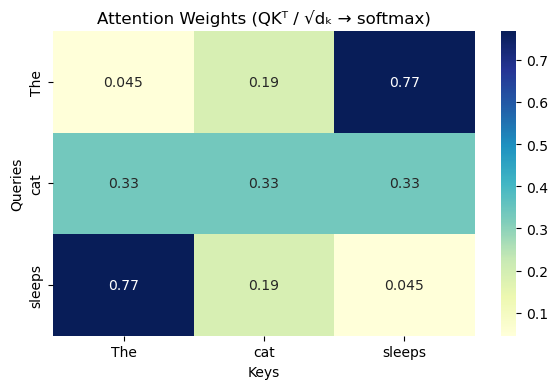

QKV Output Vectors:
             V1        V2
The     0.27747  1.186694
cat     1.00000  1.333333
sleeps  1.72253  1.186694


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

# Sample toy example: 3 tokens, 4-dimensional embeddings
tokens = ["The", "cat", "sleeps"]

# Assume we already have embeddings (randomly chosen for simplicity)
X = np.array([
    [1.0, 0.0, 1.0, 0.0],  # "The"
    [0.0, 1.0, 1.0, 0.0],  # "cat"
    [0.0, 1.0, 0.0, 1.0],  # "sleeps"
])

# Simulated W_Q, W_K, W_V (all 4x2 for simplicity)
W_Q = np.array([[1, 0], [0, 1], [1, 0], [0, 1]])
W_K = np.array([[0, 1], [1, 0], [0, 1], [1, 0]])
W_V = np.array([[1, 0], [0, 1], [1, 1], [0, 0]])

# Compute Q, K, V
Q = X @ W_Q
K = X @ W_K
V = X @ W_V

# Compute scaled dot-product attention
d_k = Q.shape[1]
scores = Q @ K.T / np.sqrt(d_k)
attention_weights = np.exp(scores) / np.exp(scores).sum(axis=1, keepdims=True)
output = attention_weights @ V

# Visualize attention weights
fig, ax = plt.subplots(figsize=(6, 4))
sns.heatmap(attention_weights, annot=True, xticklabels=tokens, yticklabels=tokens, cmap="YlGnBu", ax=ax)
ax.set_title("Attention Weights (QKᵀ / √dₖ → softmax)")
ax.set_xlabel("Keys")
ax.set_ylabel("Queries")
plt.tight_layout()
plt.show()

# Display the output matrix as a DataFrame for readability
output_df = pd.DataFrame(output, columns=["V1", "V2"], index=tokens)
print("QKV Output Vectors:")
print(output_df)


### Basic Python code in 10 steps to run the key aspect of the attention mechanism

In [ ]:
# Step 1: Represent the input
import numpy as np
from scipy.special import softmax

# let dmodel = 4 and x = 3 
x = np.array([[1.0, 0.0, 1.0, 0.0], #input1
              [0.0, 2.0, 0.0, 2.0], #input2
              [1.0, 1.0, 1.0, 1.0]]) #input3
print(x)

[[1. 0. 1. 0.]
 [0. 2. 0. 2.]
 [1. 1. 1. 1.]]


In [45]:
# Step2: Initilizing the weight matrics
# Qw --> To train the queries, Kw --> To train the keys, Vw --> To train the values
# These weights will be applied to all the inputs in this model
w_query = np.array([[1, 0, 1],
                    [1, 0, 0],
                    [0, 0, 1],
                    [0, 1, 1]])
print(w_query)

[[1 0 1]
 [1 0 0]
 [0 0 1]
 [0 1 1]]


In [46]:
w_key = np.array([[0, 0, 1],
                  [1, 1, 0],
                  [0, 1, 0],
                  [1, 1, 0]])
print(w_key)

[[0 0 1]
 [1 1 0]
 [0 1 0]
 [1 1 0]]


In [47]:
w_value = np.array([[0, 2, 0],
                    [0, 3, 0],
                    [1, 0, 3],
                    [1, 1, 0]])
print(w_value)

[[0 2 0]
 [0 3 0]
 [1 0 3]
 [1 1 0]]


In [48]:
# Step3: Matrix Multiplication to obtain Q, K and V
# Assuming there are only one w_query, w_key and w_value. Others approaches are possible
Q = np.matmul(x, w_query)
print(Q) # we obtain Q1 = [1., 0., 2.], Q2 = [2., 2., 2.] and Q3 = [2., 1., 3.]

[[1. 0. 2.]
 [2. 2. 2.]
 [2. 1. 3.]]


In [49]:

K = np.matmul(x, w_key)
print(K) # similarly we obtain K1, K2, and K3

[[0. 1. 1.]
 [4. 4. 0.]
 [2. 3. 1.]]


In [50]:
V = np.matmul(x, w_value)
print(V) # Similarly we obtain V1, V2 and V3

[[1. 2. 3.]
 [2. 8. 0.]
 [2. 6. 3.]]


In [51]:
#Step 4 : Scaled attention scores calculation
# The attention heads now implements the original Transformer equation.
# Attention(Q, K, V) = Softmax((Q.K^T)/ sqrt(dk)).V
# First focusing on (Q.K^T)/sqrt(dk) part of the equation in step4
# For simplicity taking sqrt(dk) = sqrt(3) = 1.75 ---> 1
k_d = 1
attention_score = (Q @ K.transpose()/k_d)
print(attention_score) # It shows that score for input #1 = Q1 @ K(All 3 keys)

[[ 2.  4.  4.]
 [ 4. 16. 12.]
 [ 4. 12. 10.]]


In [52]:
#Step5: Scaled softmax attention scores for each vector
attention_score[0] = softmax(attention_score[0])
attention_score[1] = softmax(attention_score[1])
attention_score[2] = softmax(attention_score[2])
print(attention_score[0])
print(attention_score[1])
print(attention_score[2])

[0.06337894 0.46831053 0.46831053]
[6.03366485e-06 9.82007865e-01 1.79861014e-02]
[2.95387223e-04 8.80536902e-01 1.19167711e-01]


In [53]:
#Step6: The final attention representations
print(V[0])
print(V[1])
print(V[2])
print("Attention 1")
attention1 = attention_score[0].reshape(-1, 1)
#print(attention1)
attention1 = attention_score[0][0]*V[0]
print(attention1)

print("Attention 2")
attention2 = attention_score[0].reshape(-1, 1)
attention2 = attention_score[0][1]*V[1]
print(attention2)

print("Attention 3")
attention3 = attention_score[0].reshape(-1, 1)
attention3 = attention_score[0][2]*V[2]
print(attention3)

# This is attention(Q, K, V) for input #1

[1. 2. 3.]
[2. 8. 0.]
[2. 6. 3.]
Attention 1
[0.06337894 0.12675788 0.19013681]
Attention 2
[0.93662106 3.74648425 0.        ]
Attention 3
[0.93662106 2.80986319 1.40493159]


In [54]:
#Step7: Summing up the results 
#The 3 attention value of input #1 obtained will now be summed to obtain the first line of the output matrix.
attention_input1 = attention1 + attention2 + attention3
print(attention_input1)

[1.93662106 6.68310531 1.59506841]


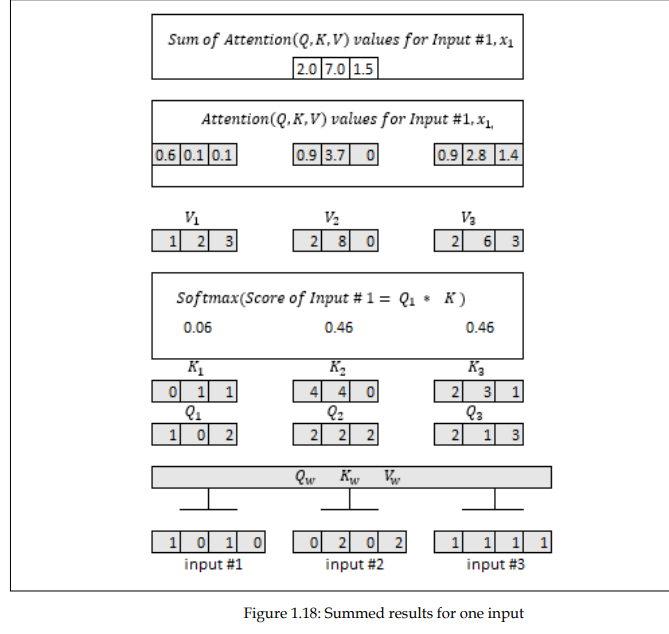

In [55]:
# This completes the steps for input #1. We now need to add the results of all the inputs to the model.

In [56]:
#Step8:Steps 1 to 7 for all the inputs
# Producing input values for #2 and #3 is same as the the process done for #1
# Let us scale up and consider dmodel = 64
# Let us consider we have 3 results of 64 dimensions each
attention_head1 = np.random.random((3, 64))

In [63]:
#Step9: We assume we have trained the 8 heads of the attention sub-layer
z0h1 = np.random.random((3, 64))
z0h2 = np.random.random((3, 64))
z0h3 = np.random.random((3, 64))
z0h4 = np.random.random((3, 64))
z0h5 = np.random.random((3, 64))
z0h6 = np.random.random((3, 64))
z0h7 = np.random.random((3, 64))
z0h8 = np.random.random((3, 64))
print(f"Shate of Head is {z0h1.shape} and total dimension of 8 heads is (64, 8)")

Shate of Head is (3, 64) and total dimension of 8 heads is (64, 8)


In [ ]:
# These 8 heads have now produced Z: Z = (z0 to z7)
# The transformer will now concatenate the 8 elements of Z for the final output of the multi-head attention sub-layer

In [66]:
# Step10: Concatenation of the output of the heads
output_attention = np.hstack((z0h1, z0h2, z0h3, z0h4, z0h5, z0h6, z0h7, z0h8))
print(f"The shape of the ouput of attention layers is {output_attention.shape}")
print(output_attention)

The shape of the ouput of attention layers is (3, 512)
[[0.40306028 0.06891053 0.85013889 ... 0.73124665 0.35740648 0.0809824 ]
 [0.20796081 0.95011049 0.84169284 ... 0.98906408 0.51663342 0.09004585]
 [0.06248674 0.99574637 0.13878378 ... 0.07828224 0.20958272 0.57094758]]


In [74]:
z1 = [[1,2,3],
      [4,5,6]]
z2 = [[7,8,9],
      [10,11,12]]
z = np.hstack((z1, z2))
z

array([[ 1,  2,  3,  7,  8,  9],
       [ 4,  5,  6, 10, 11, 12]])